In [0]:
%matplotlib inline
import pickle
from pprint import pprint
import random
import warnings
import time
# numpy, pandas, matplotlib and regular expressions (data science essentials)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# tqdm
from tqdm import tqdm
# spacy
import spacy
from spacy.lang.en import English
import en_core_web_sm
# gensim
import gensim
from gensim.models import LdaModel
from gensim import corpora
from gensim.models import CoherenceModel
# nltk
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
# split
from sklearn.model_selection import train_test_split

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Noticias_BCRP/notebooks")

In [15]:
df_noticias_bcrp=pd.read_pickle("../data/cleaned/df_noticias_bcrp_cleanedInfo_bigrams.pkl")
print(df_noticias_bcrp.shape)
df_noticias_bcrp.head()

(41861, 5)


,Texto,Texto_Limpio,Texto_Stopwords,Clean_Stopword_Info,Num_Words
0,dIZ207\n\n* FINANZAS.:.- -\n\nMomento de reest...,diz finanzas momento reestructurar las deudas ...,diz finanzas momento reestructurar deudas peia...,costo_financiamiento empresas subida_tasa poli...,66
1,",\nx¿ºQ Denartamento de Prensa\n\nALUEVES Y1 D...",xºq denartamento prensa alueves icembreoel rep...,xºq denartamento prensa alueves icembreoel rep...,republica mes construccion gasoducto_sur perua...,182
2,TrO7\n\n \n\nECONOMISTA GONTÁLEZ IZQUIERDO\n\n...,tro economista gontalez izquierdo recomiendan ...,tro economista gontalez izquierdo recomiendan ...,economista izquierdo tipo_cambio ahorrar gonza...,50
5,- 4 ENEL 2016 pégna 22\n\nFecha\n\nGESTIÓN\n\n...,enel pegna fecha gestion departamento prensa d...,enel pegna fecha gestion departamento prensa d...,enel gestion inversionistas estrategia porcent...,106
6,"SiegoHarrero,geren-\ntedeinversionesde AFP\nHa...",siegoharrerogerentedeinversionesde afp habitat...,siegoharrerogerentedeinversionesde afp habitat...,afp activo internacional acciones_europeas cob...,148


In [0]:
text_data=[i.split() for i in df_noticias_bcrp["Clean_Stopword_Info"]]
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]  
# pickle.dump( dictionary, open( "../models/topic_modelling/dictionary.pkl", "wb" ) )
len(dictionary),len(corpus)

In [0]:
pickle.dump( dictionary, open( "../models/topic_modelling/dictionary_bigrams.pkl", "wb" ) )
pickle.dump( corpus, open( "../models/topic_modelling/corpus_bigrams.pkl", "wb" ) )

In [8]:
print("Training LDA model on train dataframe...")
no_of_topics=[i for i in range(20,100,5)]
for i in no_of_topics:
  NUM_TOPICS = i
  start_time = time.time()
  ldamodel = LdaModel(corpus, 
                      num_topics=NUM_TOPICS, 
                      random_state=89, 
                      update_every=1,  
                      id2word=dictionary, 
                      passes=42, 
                      alpha='auto', 
                      per_word_topics=True)
  pickle.dump( ldamodel, open( "../models/topic_modelling/lda_models/model_bigrams_{}.pkl".format(NUM_TOPICS), "wb" ) )

Training LDA model on train dataframe...


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [17]:
list_coherence=[]
for i in no_of_topics:
  ldamodel=pickle.load(open( "../models/topic_modelling/lda_models/model_bigrams_{}.pkl".format(i), "rb" ))
  print("calculando coherencia topico {}".format(i))
  coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  list_coherence.append(coherence_lda)
np.save( "../models/topic_modelling/list_coherence_bigrams.npy",list_coherence)

calculando coherencia topico 20
calculando coherencia topico 25
calculando coherencia topico 30
calculando coherencia topico 35
calculando coherencia topico 40
calculando coherencia topico 45
calculando coherencia topico 50
calculando coherencia topico 55
calculando coherencia topico 60
calculando coherencia topico 65
calculando coherencia topico 70
calculando coherencia topico 75
calculando coherencia topico 80
calculando coherencia topico 85
calculando coherencia topico 90
calculando coherencia topico 95


In [23]:
data={"Number of Topics":no_of_topics,
 "Coherence Scores":list_coherence}
pd.DataFrame(data)

,Number of Topics,Coherence Scores
0,20,0.560130
1,25,0.561196
2,30,0.555816
3,35,0.555479
4,40,0.570049
5,45,0.559168
6,50,0.546891
7,55,0.551602
8,60,0.543281
9,65,0.529548


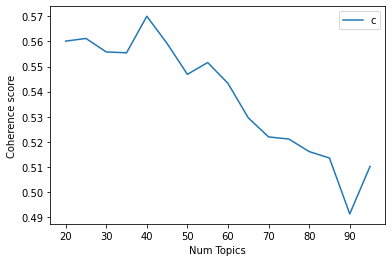

In [19]:
# Show graph
coherence_scores = list_coherence
plt.plot(no_of_topics, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
### Se logra un mejor performance con 45 topicos
ldamodel=pickle.load(open("../models/topic_modelling/lda_models/model_bigrams_{}.pkl".format(40), "rb" ))

In [0]:
names_topic={0:"GOBIERNO PPK",1:"Encaje Monetario",2:"Temporada de Turismo",3:"Distrito Constructora",4:"PROYECTO GASODUCTO SUR",5:"PROYECTO CHINCHEROS",
                 6:"COMPETITIVIDAD ECONOMICA PERU",7:"VIVIENDA SOCIAL",8:"EMPLEO FORMAL", 9:"INVERSION PUBLICA",10:"PRECIOS DEL COMBUSTIBLE",
                 11:"DEFICIT FISCAL",12:"AGUA POTABLE",13:"LAVA JATO - ODEBRECHT",14:"PRECIOS AL CONSUMIDOR",15:"BOLSA DE VALORES LIMA",16:"PARTIDO NARANJA",
                 17:"COMERCIO EXTERIOR",18:"EMPRESAS COMERCIALES",19:"INVERSION PRIVADA",20:"SECTOR PESQUERO",21:"proceso judicial vizcarra",22:"FONDO DE PENSIONES",
                 23:"TARIFA ENERGIA ELECTRICA",24:"CIRCULACION MONEDA NACIONAL",25:"MERCADO CHINO Y USA",26:"PRODUCCION PETROLERA",27:"MEDIDAS DEL MEF",
                 28:"SALUD PUBLICA",29:"FENOMENO DEL NIÑO COSTERO",30:"EXPECTAVIDA DE INFLACION",31:"RECAUDACION TRIBUTARIA - SUNAT",
                 32:"BONOS FINANCIEROS DEL ESTADO",33:"CRECIMIENTO ECONOMICO",34:"PRODUCCION AGRICOLA - SECTORES",35:"MONEDAS ALUSIVAS",
                 36:"PRODUCCCION MINERA - COBRE",37:"TASA DE REFERENCIA",38:"PRODUCTOS DE EXPORTACION",39:"CREDITOS BANCARIOS",
                 40:"DIRECTORIO BCR - PRESIDENTE",41:"CRECIMIENTO PAISES LATINOAMERICANOS",42:"PROYECTO DE LEY - CONGRESO", 43:"TIPO DE CAMBIO - PRECIO DEL DOLAR",
                 44:"CRECIMIENTO ECONOMICO SOSTENIDO - PERU" }

In [26]:
topics = ldamodel.print_topics(num_topics=40,num_words=10)
for topic in topics:
    pprint(topic)

(0,
 '0.042*"mercado" + 0.026*"ventas" + 0.023*"productos" + 0.021*"empresas" + '
 '0.019*"consumo" + 0.015*"venta" + 0.013*"compra" + 0.012*"consumidores" + '
 '0.011*"compras" + 0.011*"marca"')
(1,
 '0.046*"unidos" + 0.041*"eeuu" + 0.035*"china" + 0.031*"dijo" + '
 '0.022*"mercados" + 0.021*"mercado" + 0.015*"global" + 0.014*"bloomberg" + '
 '0.013*"mundo" + 0.013*"inversores"')
(2,
 '0.048*"peru" + 0.034*"exportaciones" + 0.020*"millones_dolares" + '
 '0.018*"pais" + 0.014*"productos" + 0.013*"turismo" + 0.012*"comercio" + '
 '0.012*"comercio_exterior" + 0.012*"china" + 0.011*"envios"')
(3,
 '0.031*"pais" + 0.023*"reconstruccion" + 0.018*"desarrollo" + 0.015*"peru" + '
 '0.014*"infraestructura" + 0.012*"dijo" + 0.012*"sector" + 0.011*"inversion" '
 '+ 0.011*"gobierno" + 0.010*"empresas"')
(4,
 '0.036*"solo" + 0.027*"pais" + 0.026*"años" + 0.024*"gobierno" + '
 '0.023*"ahora" + 0.020*"pues" + 0.020*"sino" + 0.018*"menos" + 0.017*"hoy" + '
 '0.016*"hace"')
(5,
 '0.021*"gas" + 0.018*"e